<a href="https://colab.research.google.com/github/llcorrea/dados_alura/blob/main/dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook para Imersão Dados Alura**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

**Coleta do dataset de experimentos biológicos**

In [2]:
path='https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados=pd.read_csv(path, compression='zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397



---



**Dataset: 23814 registros com 877 features**

Descrição da aplicação de determinada droga em culturas de células.

In [3]:
dados.head()
dados.tail()
dados.describe()
dados.info()
dados.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


(23814, 877)

Total de valores da feature tratamento:
 com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Porcentagem total de valores da feature tratamento:
 com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Classes de valores únicos da feature tratamento:
 ['com_droga' 'com_controle']



Text(0.5, 1.0, 'Distribuição de valores para a feature tratamento')

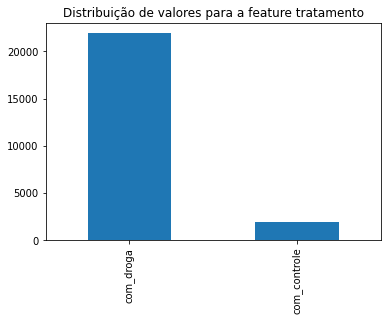

In [4]:
var='tratamento' #tipo de tratamento utilizado
dados[var] #dataseries
print('Total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde grupo com droga apresenta muito mais dados
print('Classes de valores únicos da feature %s:\n %s\n'  % (var, dados[var].unique())) #descrição dos valores únicos de uma feature, no caso tratamento: registros divididos em dois grupos, controle e teste
ax=dados['tratamento'].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

Total de valores da feature tempo:
 48    8250
72    7792
24    7772
Name: tempo, dtype: int64

Porcentagem total de valores da feature tempo:
 48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

Classes de valores únicos da feature tempo:
 [24 72 48]



Text(0.5, 1.0, 'Distribuição de valores para a feature tempo')

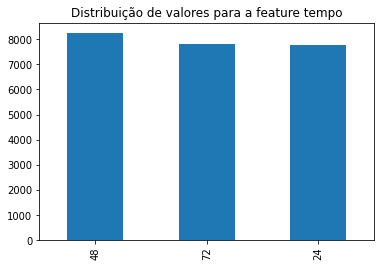

In [5]:
var='tempo' #tempo ministrando a droga
dados[var] #dataseries
print('Total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts(normalize=True))) #feature com dados mais bem balanceados em relação à feature anterior tratamento
print('Classes de valores únicos da feature %s:\n %s\n'  % (var, dados[var].unique())) #descrição dos valores únicos de uma feature: registros divididos em três grupos de tempo
ax=dados[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

Total de valores da feature dose:
 D1    12147
D2    11667
Name: dose, dtype: int64

Porcentagem total de valores da feature dose:
 D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Classes de valores únicos da feature dose:
 ['D1' 'D2']



Text(0.5, 1.0, 'Distribuição de valores para a feature dose')

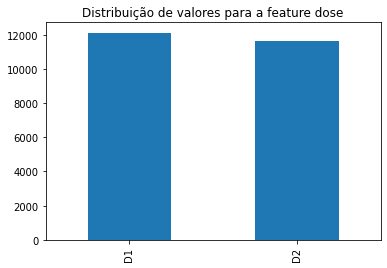

In [6]:
var='dose' #dose ministrada
dados[var] #dataseries
print('Total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts(normalize=True))) #feature com dados balanceados
print('Classes de valores únicos da feature %s:\n %s\n'  % (var, dados[var].unique())) #descrição dos valores únicos de uma feature: registros divididos em dois grupos de doses aplicadas
ax=dados[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

In [7]:
var='droga' #tipo de droga ministrada, dados provavelmente anonimizados para evitar vieses de análise
dados[var] #dataseries
print('Total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts(normalize=True))) #feature com dados balanceados
print('Classes de valores únicos da feature %s:\n %s\n'  % (var, dados[var].unique())) #descrição dos valores únicos de uma feature: 3289 tipos diferentes de drogas ministradas
print('Total de valores únicos da feature %s:\n %i\n'  % (var, len(dados[var].unique())))

Total de valores da feature droga:
 cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
d9fcbe12c       1
5cc5a5a19       1
cf21e6ee0       1
e3e768009       1
122c63321       1
Name: droga, Length: 3289, dtype: int64

Porcentagem total de valores da feature droga:
 cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
d9fcbe12c    0.000042
5cc5a5a19    0.000042
cf21e6ee0    0.000042
e3e768009    0.000042
122c63321    0.000042
Name: droga, Length: 3289, dtype: float64

Classes de valores únicos da feature droga:
 ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']

Total de valores únicos da feature droga:
 3289



**Utilização do Seaborn:**

Análise de drogas aplicadas nos experimentos.

Drogas representam compostos químicos. Por isso a alteração do nome da feature droga por composto, o qual representa melhor a classe.

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')


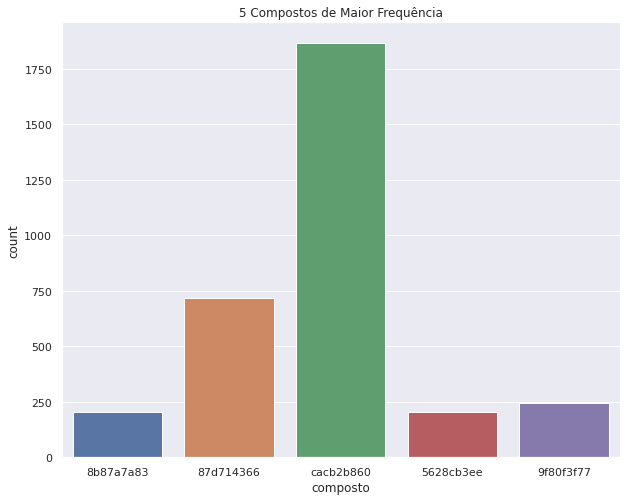

In [8]:
sns.set()
plt.figure(figsize=(10, 8))

dados_novos=dados.rename(columns={'droga':'composto'}) #criação de um novo df contendo a alteração no nome da feature droga
dados_novos.columns

var='composto'
compostos=dados_novos[var].value_counts().index[:5] #índice de compostos aplicadas com maior frequência
print(compostos)

dados_novos.query('composto in @compostos') #registros contendo apenas os compostos de maior frequência

ax=sns.countplot(x='composto', data=dados_novos.query('composto in @compostos'))
ax.set_title('5 Compostos de Maior Frequência')
plt.show()

In [9]:
#especificação de condições para os valores de dados dentro de features
#dados_novos[dados_novos['tratamento']=='com_droga']
#dados_novos[dados_novos['tempo']==24]



---



**Análise das features que descrevem os *genes*, na forma g-X, onde X representa o índice de um dado gene:**

**Gene representa um fragmento de DNA, por exemplo 'g-0': O valor da feature 'g-0' descreve a expressão gênica do gene 0 de um dado registro.**

Expresão gênica normal representa a geração de 4 RNAs (1x) (RNA mensageiro) que carregam a informação necessária à síntese da proteína que ocorre fora do núcleo da célula. 

O RNA conduz as informações gênicas do DNA de dentro do núcleo da célula para fora do núcleo, onde a síntese proteica ocorre.

Expressão gênica corresponde a geração de RNAs pela célula para que a síntese proteica ocorra. 

Expressao gênica normal gera 4 RNAs (1x), expressões alteradas devidos a outros estimulos na célula geram outras quatidades de RNAs. Por exemplo, 8 RNAs gerados representa uma expressão gênica 2x da normal.

In [10]:
var='g-0' #gene 0, o valor da feature descreve a expressão gênica do gene 0, dados provavelmente normalizados
dados_novos[var] #dataseries
print('Total de valores da feature %s:\n %s\n' % (var, dados_novos[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n %s\n' % (var, dados_novos[var].value_counts(normalize=True)))
print('Classes de valores únicos da feature %s:\n %s\n'  % (var, dados_novos[var].unique())) #descrição dos valores únicos de uma feature
print('Total de valores únicos da feature %s:\n %i\n'  % (var, len(dados_novos[var].unique())))

Total de valores da feature g-0:
  0.0000     22
-0.3372     15
 10.0000    14
-1.0040     10
-1.0850      9
            ..
-0.5619      1
 0.5292      1
-0.1732      1
-0.3844      1
 0.1284      1
Name: g-0, Length: 14367, dtype: int64

Porcentagem total de valores da feature g-0:
  0.0000     0.000924
-0.3372     0.000630
 10.0000    0.000588
-1.0040     0.000420
-1.0850     0.000378
              ...   
-0.5619     0.000042
 0.5292     0.000042
-0.1732     0.000042
-0.3844     0.000042
 0.1284     0.000042
Name: g-0, Length: 14367, dtype: float64

Classes de valores únicos da feature g-0:
 [ 1.062   0.0743  0.628  ...  0.3942  0.666  -0.8598]

Total de valores únicos da feature g-0:
 14367



**Análise geral de genes:**

Os genes utilizados nos experimentos são descritos como uma sequência de identificadores inteiros, iniciando em g-0 até g-771, resultando em 772 tipos diferentes de genes.

Todas as features de genes possuem valores, não há incidência de valores nulos ou faltantes em nenhuma das 772 features de genes. Os valores em cada feature representam o nível de expressão gênica de determinado gene e certo experimento.

In [11]:
#descobrindo todas as fetures de genes
id_genes=[]
for i in dados_novos.columns:
  if i[:2] == 'g-':
    id_genes.append(i)
print('Total de tipos de genes analisados:', len(id_genes), '\n')

for gen in id_genes:
  print('Total de valores únicos da feature (gene) %s: %i de %i'  % (gen, len(dados_novos[gen].unique()), len(dados_novos[gen])))

Total de tipos de genes analisados: 772 

Total de valores únicos da feature (gene) g-0: 14367 de 23814
Total de valores únicos da feature (gene) g-1: 13893 de 23814
Total de valores únicos da feature (gene) g-2: 14210 de 23814
Total de valores únicos da feature (gene) g-3: 12793 de 23814
Total de valores únicos da feature (gene) g-4: 14038 de 23814
Total de valores únicos da feature (gene) g-5: 14375 de 23814
Total de valores únicos da feature (gene) g-6: 13741 de 23814
Total de valores únicos da feature (gene) g-7: 14106 de 23814
Total de valores únicos da feature (gene) g-8: 14583 de 23814
Total de valores únicos da feature (gene) g-9: 14081 de 23814
Total de valores únicos da feature (gene) g-10: 14316 de 23814
Total de valores únicos da feature (gene) g-11: 14385 de 23814
Total de valores únicos da feature (gene) g-12: 14274 de 23814
Total de valores únicos da feature (gene) g-13: 14186 de 23814
Total de valores únicos da feature (gene) g-14: 14400 de 23814
Total de valores únicos

**Histograma para análise de genes:**

Análise da distribuição de valores de um dado gene, por exemplo gene g-0.

Nota-se a distribuição em torno do 0, o que reforça a normalização de valores. Além disso, visualmente g-0 tende a apresentar distribuição normal em torno do valor 0.

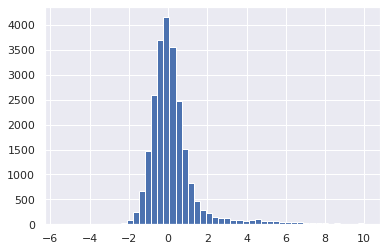

In [12]:
dados_novos['g-0'].min(), dados_novos['g-0'].max()
dados_novos['g-0'].hist(bins=50)

In [13]:
#descrição analítica de todos os genes 
dados_novos.loc[:,id_genes[0]:id_genes[-1]].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

**Histograma das medidas de posição dos valores de cada gene:**

**Média:** A distribuição das médias de todos os valores de cada gene segue a distribuição normal, concentrando-se em média próxima ao valor 0. Contudo, percebe-se que os valores de cada gene podem diferir já que alguns apresentam médias distintas.

**Mediana:** A mediana dos valores de cada gene tende a concentrar-se no valor 0. Nesse, a mediana em 0 indica que 50% dos valores de expressão gênica para um certo gene possuem valores acima de 0 e os outros 50% possuem valores abaixo de 0. 

**Valores mínimos e máximos:** Em relação aos valores mínimos e máximos de cada gene, nota-se grande concentração dos genes em ambos os limites. Indicação de normalização de valores utilizando -10 e 10 como intervalos de corte. Contudo, já que os valores originais não foram fornecidos, o método e a forma de normalização acaba tornando-se irrelevante pela falta de informação.

Já a relação entre os valores (nível de expressão gênica) de um certo gene ou entre genes para um certo registro (experimento) importam, e estão reportados no df para possibilitar análises de expressão entre genes ou experimentos distintos.

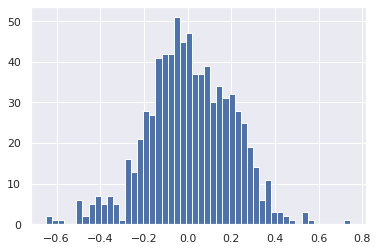

In [14]:
dados_novos.loc[:,id_genes[0]:id_genes[-1]].describe().T['mean'].hist(bins=50)

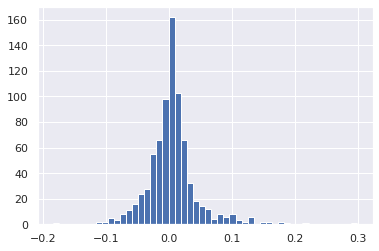

In [15]:
dados_novos.loc[:,id_genes[0]:id_genes[-1]].describe().T['50%'].hist(bins=50)

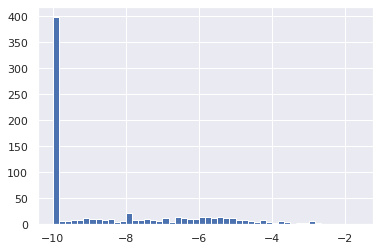

In [16]:
dados_novos.loc[:,id_genes[0]:id_genes[-1]].describe().T['min'].hist(bins=50)

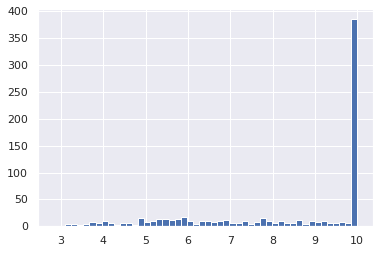

In [17]:
dados_novos.loc[:,id_genes[0]:id_genes[-1]].describe().T['max'].hist(bins=50)



---



**Análise das features que descrevem as linhagens celulares, representadas na forma c-X, onde X representa o índice de uma linhagem:**

Cada *c* representa uma linhagem celular, que pode ser, por exemplo, a linhagem de um câncer específico, linhagem de células saudáveis de órgãos específicos, etc.

O objetivo de incluir diversas linhagens de células em cada registro consiste em garantir que a análise não fique enviesada para apenas um tipo de linhagem celular. Os vários *c's* cobrem várias linhagens. 

Os valores da feature 'c-0' descrevem a resposta da linhagem celular identificada em 0 para cada experimento realizado, no caso considerando a influência de determinada droga ministrada. A resposta representa a viabilidade desse tipo celular ao tratamento, ou seja, a sobrevivência das celulas.

In [18]:
var='c-0' #linhagem 0
dados_novos[var] #dataseries
print('Total de valores da feature %s:\n %s\n' % (var, dados_novos[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n %s\n' % (var, dados_novos[var].value_counts(normalize=True)))
print('Classes de valores únicos da feature %s:\n %s\n'  % (var, dados_novos[var].unique())) #descrição dos valores únicos de uma feature
print('Total de valores únicos da feature %s:\n %i\n'  % (var, len(dados_novos[var].unique())))

Total de valores da feature c-0:
 -10.0000    224
-1.1180      10
 1.0200       9
 1.0100       9
-1.0830       9
           ... 
-0.9057       1
-0.0710       1
 0.4981       1
-0.8023       1
 0.9321       1
Name: c-0, Length: 14421, dtype: int64

Porcentagem total de valores da feature c-0:
 -10.0000    0.009406
-1.1180     0.000420
 1.0200     0.000378
 1.0100     0.000378
-1.0830     0.000378
              ...   
-0.9057     0.000042
-0.0710     0.000042
 0.4981     0.000042
-0.8023     0.000042
 0.9321     0.000042
Name: c-0, Length: 14421, dtype: float64

Classes de valores únicos da feature c-0:
 [-0.06    0.0927 -0.1312 ...  0.3509  0.9538 -2.389 ]

Total de valores únicos da feature c-0:
 14421



**Análise geral das linhagens celulares:**

As linhagens celulares utilizadas nos experimentos são descritas como uma sequência de identificadores inteiros, iniciando em c-0 até c-99, resultando em 100 tipos diferentes de células.

Todas as features de linhagens possuem valores, não há incidência de valores nulos ou faltantes em nenhuma das 100 features de genes. 

Os valores em cada feature representam a resposta de determinada linhagem ou tipo celular a um certo experimento.

In [19]:
#descobrindo todas as features de tipos celulares
id_linhagens=[]
for i in dados_novos.columns:
  if i[:2] == 'c-':
    id_linhagens.append(i)
print('Total de tipos de genes analisados:', len(id_linhagens), '\n')

for lin in id_linhagens:
  print('Total de valores únicos da feature (gene) %s: %i de %i'  % (lin, len(dados_novos[lin].unique()), len(dados_novos[lin])))

Total de tipos de genes analisados: 100 

Total de valores únicos da feature (gene) c-0: 14421 de 23814
Total de valores únicos da feature (gene) c-1: 14839 de 23814
Total de valores únicos da feature (gene) c-2: 14548 de 23814
Total de valores únicos da feature (gene) c-3: 14626 de 23814
Total de valores únicos da feature (gene) c-4: 14696 de 23814
Total de valores únicos da feature (gene) c-5: 14639 de 23814
Total de valores únicos da feature (gene) c-6: 14656 de 23814
Total de valores únicos da feature (gene) c-7: 14544 de 23814
Total de valores únicos da feature (gene) c-8: 14667 de 23814
Total de valores únicos da feature (gene) c-9: 14880 de 23814
Total de valores únicos da feature (gene) c-10: 14617 de 23814
Total de valores únicos da feature (gene) c-11: 14602 de 23814
Total de valores únicos da feature (gene) c-12: 14580 de 23814
Total de valores únicos da feature (gene) c-13: 14658 de 23814
Total de valores únicos da feature (gene) c-14: 14635 de 23814
Total de valores únicos

**Histograma para análise de tipos celulares:**

Análise da distribuição de valores de um dado tipo celular, por exemplo gene c-0.

Nota-se a distribuição de valores em torno do 0. Os valores de c-0, visualmente tendem a apresentar distribuição normal em torno do valor 0.

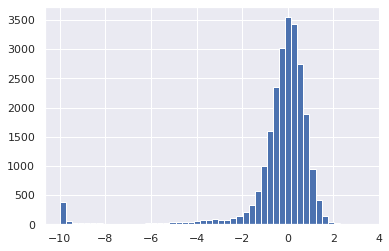

In [20]:
dados_novos['c-0'].min(), dados_novos['c-0'].max()
dados_novos['c-0'].hist(bins=50)

In [21]:
#descrição analítica de todos os genes 
dados_novos.loc[:,id_linhagens[0]:id_linhagens[-1]].describe()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,-0.486027,-0.473410,-0.508091,-0.510905,-0.306528,-0.452293,-0.337267,-0.473728,-0.619461,-0.330389,-0.454165,-0.496059,-0.383134,-0.295655,-0.443384,-0.449683,-0.597730,-0.431899,-0.501831,-0.288958,-0.385486,-0.434420,-0.322990,-0.545691,-0.461527,-0.350457,-0.477049,-0.209301,-0.598003,-0.397430,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,2.066695,2.058766,2.140051,2.170919,1.575507,1.974010,1.594663,2.079550,2.294899,1.641563,2.001374,2.023053,1.690235,1.536784,1.967079,1.899095,2.268931,1.916467,1.904629,1.521773,1.741182,1.988458,1.772399,2.201552,1.974772,1.751440,1.965178,1.287766,2.297375,1.838205,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.910000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775,-0.571250,-0.524275,-0.551100,-0.654675,-0.564000,-0.546475,-0.555500,

**Histograma das medidas de posição dos valores de cada linhagem celular:**

**Média,** 
**Mediana,** 
**Valores mínimos e máximos.**

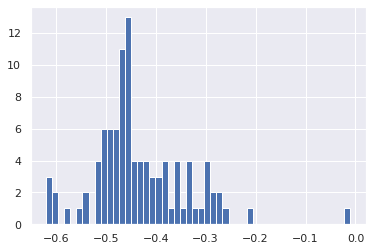

In [22]:
dados_novos.loc[:,id_linhagens[0]:id_linhagens[-1]].describe().T['mean'].hist(bins=50)

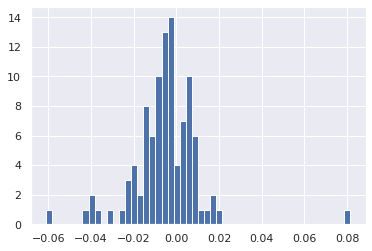

In [23]:
dados_novos.loc[:,id_linhagens[0]:id_linhagens[-1]].describe().T['50%'].hist(bins=50)

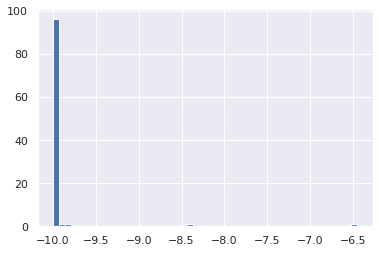

In [24]:
dados_novos.loc[:,id_linhagens[0]:id_linhagens[-1]].describe().T['min'].hist(bins=50)

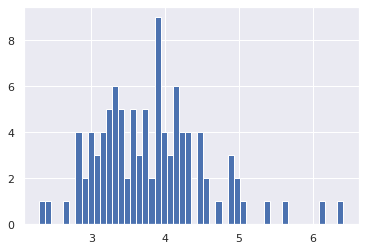

In [25]:
dados_novos.loc[:,id_linhagens[0]:id_linhagens[-1]].describe().T['max'].hist(bins=50)

**Boxplot com Seaborn:**

Valores da linhagem celular *c-0*.

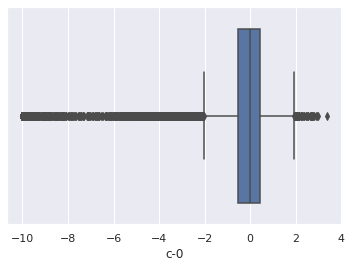

In [26]:
sns.boxplot(x='c-0', data=dados_novos)

**Boxplot com Seaborn:**

Valores do gene *g-0*.

Valores do gene g-0, dividindo registros de acordo com o tratamento utilizado (com droga ou sem droga (com controle)).

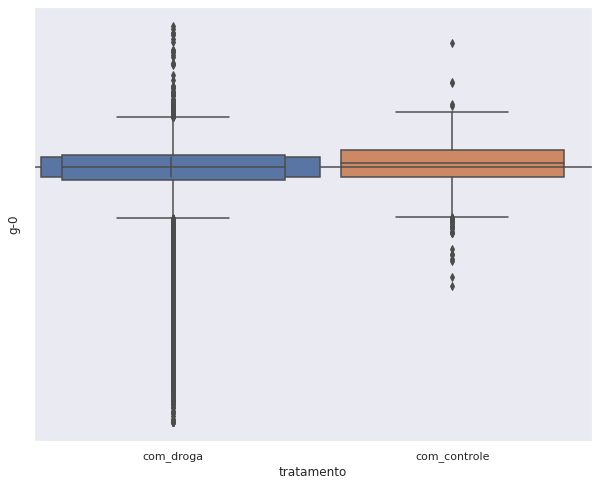

In [27]:
sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(x='g-0', data=dados_novos)
sns.boxplot(y='g-0', x='tratamento', data=dados_novos)



---



**Relação entre variáveis:**

Tabela de frequências para relacionar variáveis de um dataset.

Lib. Pandas Crosstab: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

*"Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed."*

In [28]:
dados_novos

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4

**Relação entre features: Número de registros relacionando features**

Tratamento: grupos controle e com droga 

> X

Dose: duas doses D1 e D2

> X

Tempo: 3 tempos de aplicação 24, 48 e 71.

Observa-se através dessa relação entre as três variáveis que as categorias internas aos dois grandes grupos (controle e com droga) aparentam estarem balanceados. Através da normalização por índice o balanceamento fica melhor ilustrado.

Contudo, o número de dados em cada um desses grandes grupos estão desbalanceados, visto que o grupo controle apresenta 1866 registros e o grupo com droga apresenta 21948 dados.

In [29]:
var='tratamento'
print('Total de valores da feature %s:\n %s\n' % (var, dados[var].value_counts()))
pd.crosstab([dados_novos['dose'], dados_novos['tempo']], dados_novos['tratamento'], normalize='index')

Total de valores da feature tratamento:
 com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64



tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Agregando ao crosstab informação extra de outra feature através da relação entre dose, tempo e tratamento. 

No caso, a média de *g-0* em cada um dos grupos formados. 

Por exemplo, observa-se o aumento da expressão de g-0 no grupo com droga comparado ao controle. 

Também existem indícios que a dose 1 aumentou a expressão em relação à dose 2. 

Observa-se também que o tempo 48 tendeu a aumentar a expressão em relação ao menor tempo de 24. Contudo, talvez não existam diferenças de expressão entre os dois maiores tempos (48 e 72).

Testes estatísticos nesse são necessários para comprovar tais hipóteses e avaliar se as amostras diferem ou não significativamente.

In [30]:
pd.crosstab([dados_novos['dose'], dados_novos['tempo']], dados_novos['tratamento'], values=dados_novos['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [31]:
pd.crosstab([dados_novos['dose'], dados_novos['tempo']], dados_novos['tratamento'], values=dados_novos['g-0'], aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

**Desafio: Criar tabela de frequências com o pandas.groupby().**

Utilizando a relação entre as features tratamento, dose e tempo, o groupby através da média mostra os valores médios para as features numéricas (g-X e c-X) de cada grupo formado a partir dessa relação.

In [32]:
dados_novos.groupby(['tratamento', 'dose', 'tempo']).mean()

g-0       g-1  ...      c-98      c-99
tratamento   dose tempo                      ...                    
com_controle D1   24    -0.251760 -0.453322  ...  0.350566  0.342308
                  48    -0.122773 -0.453638  ...  0.408657  0.450673
                  72    -0.295271 -0.669059  ...  0.379652  0.319684
             D2   24     0.010754 -0.229451  ...  0.134107  0.112021
                  48     0.013174  0.001737  ...  0.232461  0.169539
                  72     0.070250  0.133537  ...  0.200942  0.165440
com_droga    D1   24     0.367996 -0.170839  ... -0.340809 -0.216371
                  48     0.412469 -0.142581  ... -0.634006 -0.389838
                  72     0.286250 -0.127878  ... -0.835132 -0.588545
             D2   24     0.115253 -0.081764  ... -0.254499 -0.187848
                  48     0.214480 -0.001143  ... -0.485368 -0.317882
                  72     0.253439  0.052840  ... -0.644784 -0.391018

[12 rows x 872 columns]

**Análise de expressão considerando a mesma relação anterior para os dois compostos de maior ocorrência:**

In [33]:
var='composto'
compostos=dados_novos[var].value_counts().index[:2] #compostos com maiores frequências
#print(compostos)

dados_composto=dados_novos.query('composto in @compostos') #registros contendo apenas os dois compostos de maiores frequências
dados_composto.groupby(['tratamento', 'dose', 'tempo', 'composto']).mean()

g-0       g-1  ...      c-98      c-99
tratamento   dose tempo composto                       ...                    
com_controle D1   24    cacb2b860 -0.251760 -0.453322  ...  0.350566  0.342308
                  48    cacb2b860 -0.122773 -0.453638  ...  0.408657  0.450673
                  72    cacb2b860 -0.295271 -0.669059  ...  0.379652  0.319684
             D2   24    cacb2b860  0.010754 -0.229451  ...  0.134107  0.112021
                  48    cacb2b860  0.013174  0.001737  ...  0.232461  0.169539
                  72    cacb2b860  0.070250  0.133537  ...  0.200942  0.165440
com_droga    D1   24    87d714366  4.333215  0.685401  ... -4.780322 -3.197694
                  48    87d714366  6.175519 -0.329397  ... -7.793679 -5.196076
                  72    87d714366  5.250862 -1.430385  ... -9.366878 -7.523455
             D2   24    87d714366  3.016754  0.664051  ... -5.166175 -3.531193
                  48    87d714366  5.430000  1.447887  ... -7.729767 -5.723897
                  72    87d714366  5.920858  0.703211  ... -9.353150 -6.501389

[12 rows x 872 columns]

**Desafio: Criar tabela de frequências com o pandas.melt().**

Utilizando a relação entre as features tratamento, dose e tempo, o melt exibe os valores para a feature *g-0* de cada grupo formado a partir dessa relação.

In [34]:
pd.melt(dados_novos, id_vars=['tratamento', 'dose', 'tempo'], value_vars=['g-0'])

,tratamento,dose,tempo,variable,value
0,com_droga,D1,24,g-0,1.0620
1,com_droga,D1,72,g-0,0.0743
2,com_droga,D1,48,g-0,0.6280
3,com_droga,D1,48,g-0,-0.5138
4,com_droga,D2,72,g-0,-0.3254
...,...,...,...,...,...
23809,com_droga,D2,24,g-0,0.1394
23810,com_droga,D2,24,g-0,-1.3260
23811,com_controle,D2,48,g-0,0.3942
23812,com_droga,D1,24,g-0,0.6660


**Gráfico de dispersão para análise de relação entre variáveis:**

Analisando a distribuição de valores para as features g-0 e g-3, não e possível perceber nenhum tipo de padrão entre os valores (sem correlação).

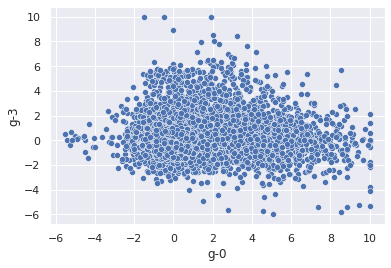

In [35]:
#dados_novos.loc[:,['g-0','g-3']]
sns.scatterplot(x='g-0', y='g-3', data=dados_novos[['g-0', 'g-3']])

Contudo, analisando a distribuição de valores para as features g-0 e g-8, já observa-se um padrão mais definido. Nota-se uma tendência de queda nos valores de g-8 a medida em que os valores de g-0 aumentam (correlação negativa).

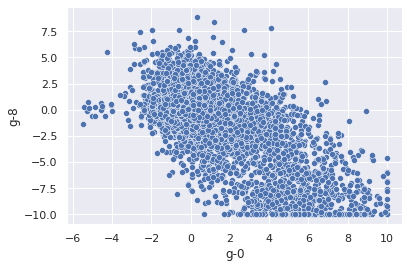

In [36]:
sns.scatterplot(x='g-0', y='g-8', data=dados_novos[['g-0', 'g-8']])

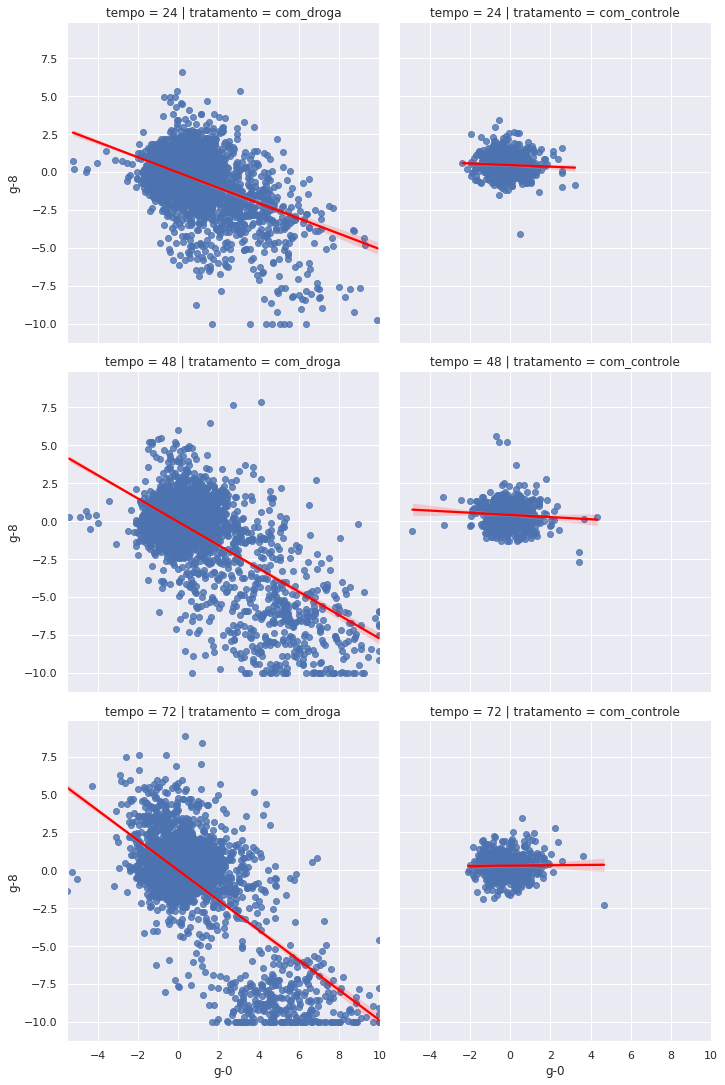

In [37]:
sns.lmplot(x='g-0', y='g-8', data=dados_novos, line_kws={'color':'red'}, col='tratamento', row='tempo')

**Correlação entre variáveis:**

O objetivo do estudo da correlação é determinar o grau de relacionamento entre duas variáveis. Caso os pontos das variáveis, representados num plano cartesiano (x, y) ou gráfico de dispersão, apresentem uma dispersão ao longo de uma reta imaginária, dizemos que os dados apresentam uma correlação linear que pode ser negativa (-1) ou positiva (1).

Correlação totalmente positiva (1): Os valores de ambas as variáveis apresentam comportamentos muito semelhantes. Por exemplo, a medida em que um aumenta o outro aumenta também.

Correlação totalmente negativa (-1): Os valores de ambas as variáveis apresentam comportamentos muito semelhantes, mas são inversamente correlacionados. Por exemplo, a medida em que um aumenta o outro diminui.

Sem correlação (0): Os valores de ambas as variáveis nao apresentam comportamentos semelhantes.

Analisando as relações dos gráficos de dispersão anteriores, observa-se que g-0 e g-3 apresentam correlação de 0.011, o que atesta que as variáveis não estão correlacionadas.

Já g-0 e g-8 apresentam correlação de -0.604, comprovando a correlação negativa entre as variáveis.

**Porém, correlação não implica em caudalidade.**

O fato de variáveis estarem correlacionados não quer dizer que uma influêncie no comportamento da outra. O padrão de comportamento pode estar associado a fatores externos sem relação entre si.

In [38]:
dados_novos.loc[:, id_genes[0]:id_genes[-1]].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

**Plotagem das correlações:**

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

Geração da matriz diagonal de correlação entre variáveis de genes.

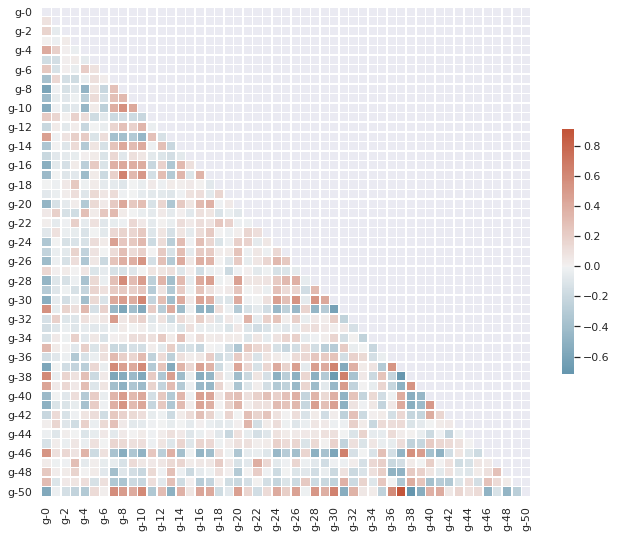

In [39]:
# Compute the correlation matrix
#corr = dados_novos.loc[:, id_genes[0]:id_genes[-1]].corr()
corr = dados_novos.loc[:, 'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Geração da matriz diagonal de correlação entre variáveis de linhagens celulares.

Observa-se a alta correlação entre os valores dos diferentes tipos celulares, diferentemente dos genes.

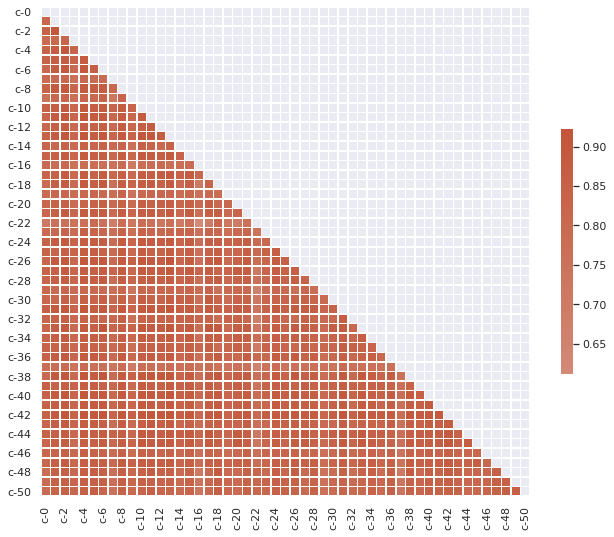

In [40]:
# Compute the correlation matrix
#corr = dados_novos.loc[:, id_genes[0]:id_genes[-1]].corr()
corr = dados_novos.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Correlação entre genes e tipos celulares:**

In [41]:
dados_novos.iloc[:, np.r_[5:55,772:822]].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,-0.629189,-0.669697,-0.608954,-0.642211,-0.630989,-0.626020,-0.631486,-0.629841,-0.643529,-0.622502,-0.647751,-0.638829,-0.678957,-0.594877,-0.643239,-0.684132,-0.630950,-0.543857,-0.579103,-0.660192,-0.605740,-0.620731,-0.661781,-0.647510,-0.615229,-0.653816,-0.659935,-0.646008,-0.656088,-0.649368,-0.639943,-0.606850,-0.565831,-0.627974,-0.645185,-0.617530,-0.646511,-0.654105,-0.619767,-0.655768
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.004664,-0.027941,-0.003155,-0.016199,0.012004,-0.011896,-0.028692,-0.016804,-0.039030,-0.018724,0.001283,-0.020506,-0.028191,-0.006079,-0.004661,-0.009059,-0.013806,0.052851,0.019902,-0.015551,0.020494,-0.021502,-0.023190,-0.026067,-0.016824,-0.008202,-0.035886,-0.020831,-0.016770,0.006563,-0.005731,-0.032461,-0.037041,-0.027810,0.001859,-0.033150,-0.013812,0.008141,-0.028824,-0.015203
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,-0.170701,-0.181008,-0.175473,-0.178634,-0.163261,-0.180958,-0.176356,-0.180042,-0.183370,-0.174772,-0.180545,-0.162327,-0.177785,-0.169176,-0.170238,-0.182883,-0.172854,-0.137744,-0.193688,-0.170649,-0.171545,-0.179031,-0.184632,-0.162529,-0.166055,-0.177225,-0.185423,-0.184273,-0.187304,-0.173426,-0.187504,-0.160625,-0.160252,-0.181268,-0.183121,-0.180550,-0.175385,-0.193517,-0.167275,-0.187155
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,-0.054947,-0.118651,-0.031232,-0.060544,-0.098435,-0.056865,-0.072926,-0.081498,-0.078792,-0.072001,-0.041614,-0.057309,-0.085462,-0.064829,-0.025428,-0.069663,-0.070663,0.070106,-0.001622,-0.060156,-0.007329,-0.108669,-0.068180,-0.084874,-0.038126,-0.057558,-0.096243,-0.040765,-0.091024,-0.042440,-0.048595,-0.077177,-0.033611,-0.101452,-0.028037,-0.085204,-0.045566,-0.067272,-0.067388,-0.062907
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,-0.384914,-0.364633,-0.378776,-0.383263,-0.346834,-0.37901

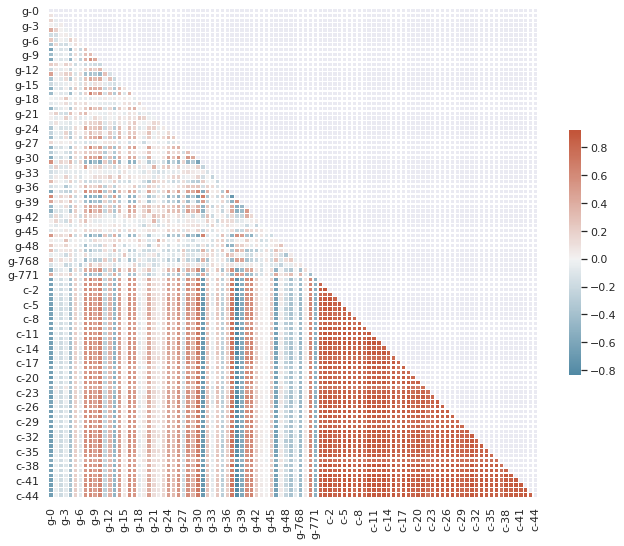

In [42]:
# Compute the correlation matrix
corr=dados_novos.iloc[:, np.r_[5:55,772:822]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Análise do dataset de Resultados:**

Cada feature representa um mecanismo de ação de um composto sobre os alvos (experimentos) do dataset anterior.

Droga agonista: ativa o receptor.

Droga antagonista: inibe o receptor.

Valor 1 para um mecanismo indica que esse mecanismo foi ativado em dado experimento. 0 indica não ativação do mecanismo.

As linhas representam os experimentos do dataset anterior indicando quais mecanismos de ativação foram ativados pelos experimentos.

In [43]:
dados_resultados=pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.shape
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
dados_resultados['acat_inhibitor'].unique()

array([0, 1])

In [45]:
dados_resultados['5-alpha_reductase_inhibitor'].unique()

array([0, 1])

In [46]:
#seleção de colunas pelo tipo e aplicação de função agregadora em cada feature (mecanismo de ativação)
contagem_moa=dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False) #número de vezes que os mecanismos (moa) foram ativados
contagem_moa

#descarte de coluna ao invés da seleção
contagem_moa=dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False) #número de vezes que os mecanismos (moa) foram ativados
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [47]:
dados_resultados.drop('id', axis=1).sum(axis=1) #soma de ativações por experimento (registros do dataset)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

**Relacionando experimentos que ativaram e não ativaram MOAs:**

Para relacionar informações de dois datasets é necessário juntá-los (merge) para a realização das análises.

Grupo controle não deveria ativar MOAs, enquanto grupo com droga espera-se que ative algum MOAs. A não ativação em um experimento com droga pode indicar a ineficácia do composto nesse cenário testado.

In [48]:
dados_resultados['n_moa']=dados_resultados.drop('id', axis=1).sum(axis=1)

In [49]:
dados_resultados['ativo_moa']=dados_resultados['n_moa']!=0
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


**Merge de DataFrames:**

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Combinando as tabelas de experimentos e de resultados dos mecanismos ativados.

In [50]:
dados_combinados=pd.merge(dados_novos, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id') #on representa a chave primária da tabela criada
dados_combinados.head()

dados_combinados.query('tratamento=="com_controle"')['ativo_moa'].unique() #nenhum MOA foi ativado no grupo controle, o que era esperado

array([False])

In [51]:
dados_combinados.query('tratamento=="com_droga"')['ativo_moa'].value_counts() #vários experimentos não ativaram nenhum MOA

True     14447
False     7501
Name: ativo_moa, dtype: int64

**Efeito dos compostos de maior ocorrência sobre o gene 0, indicando se houve ativação ou não de algum MOA:**

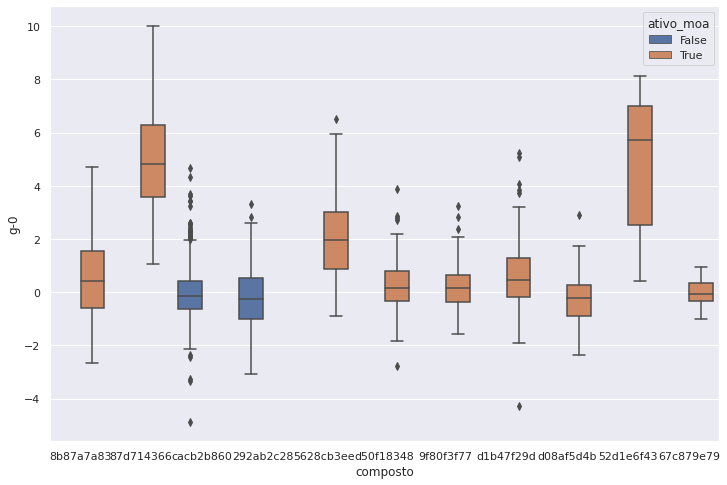

In [52]:
compostos_principais=dados_combinados['composto'].value_counts().index[:11]
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_combinados.query('composto in @compostos_principais'), x='composto', y='g-0', hue='ativo_moa')

**Desafio: Criar coluna eh_controle?**

**Desafio: Criar três colunas dizendo se é 24h, 48h ou 72h em relação ao tempo**

**Desafios 5 a 7 da aula 4**

In [53]:
dados_combinados['eh_controle']=dados_combinados['tratamento']=='com_controle'
dados_combinados['tempo_24']=(dados_combinados['tempo']==24).astype(int) 
dados_combinados['tempo_48']=(dados_combinados['tempo']==48).astype(int) 
dados_combinados['tempo_72']=(dados_combinados['tempo']==72).astype(int) 
dados_combinados

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.0014,0.3154,-0.2071,-0.

**Modelo de Machine Learning:**

**“Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed” - (definição clássica de Arthur Samuel, cientista da computação, 1959)**

Problemas a serem resolvidos com ML:

Categóricos:

1) Dado os experimentos, predizer se algum experimento ativou ou não algum MOA - Classificação binária.

2) Dado os experimentos, descobrir se um determinado MOA foi ativado, recebendo como resposta, o composto (experimento) relacionado - Classificação multiclasse.

Aqui, como um composto pode acionar mais de um mecanismo, tem-se uma classificação multilabel (quando uma única instância pode ter mais de uma classe associada) e, através de um algoritmo de Machine Learning é possível resolver este problema: **não somente ter como retorno se um mecanismo de ação foi ativado mas qual ou quais são estes mecanismos.**

**Estruturação dos dados:**

É importante lembrar que as bases de dados estão separadas com um propósito. A segunda base dados_resultados é como se fosse a resposta da primeira e foi construída por cientistas que analisaram o efeito de um determinado composto nos mais de 700 genes. Esse conhecimento, virou uma base de dados com o passar dos anos e é fruto de análise científica.

E o papel de um modelo de ML neste caso é, a partir de todo esforço humano empenhado por vários anos para entender e tabular qual efeito de um composto quimíco em uma determinada expressão gênica, ser treinado e aprender, ou seja, ser capaz de produzir resultados compatíveis com aqueles feitos pelos(as) próprios(as) cientistas.



**Problema de ML:**

**Classificação binária: dado os experimentos, predizer se QUALQUER mecanismo de ação foi ativado ou não.**

Basicamente, o modelo terá de fazer predições compatível com a coluna da base de dados dados_combinados, a *ativo_moa*.

As etapas lógicas do processo são:

Dado um composto (experimento considerando informações de como esse composto foi ministrado) -> temos a assinatura celular (resposta de genes e células) -> analisamos os mecanismos de ação ativados (MOA);

Mas, a pergunta a ser respondida é: **Dado um composto e uma assinatura celular, houve algum MOA ativado?** 

Então, as etapas lógicas passam a ser:

**Composto -> assinatura celular -> MOA ativado?**

Aprendendo a partir da base de dados: Cada composto representa uma linha da tabela.

Composto 1 -> Assinatura A -> MoA = 1 \
Composto 2 -> Assinatura B -> MoA = 0 \
Composto 3 -> Assinatura C -> MoA = 1 \
... \
Composto N -> Assinatura N -> MoA = 0 \

Ou seja, toda a base de dados dados_combinados será a fonte de aprendizado do modelo de ML. Onde, cada experimento (linha) representa um exemplo (assinatura) qu engloba todas as informações necessárias para criar a classificação binária e, terá como variável resposta, também chamada de target, a coluna ativo_moa, uma variável binária (0, 1).

Por fim, o modelo deverá ser capaz de resolver o seguinte problema:

**Composto candidato (experimento com informações de dose, tempo e tipo de composto) -> Assinatura X -> MoA = 1 OU MoA = 0?**

**Técnica de ML: Regressão Logística**

Existem diversas técnicas de ML que são capazes de solucionar esse problema, porém vamos usar a Regressão Logística através do Scikit-Learn.

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Divisão do dataset entre treino e teste:

Treino: Conjunto de dados de aprendizado.

Teste: Conjunto de validação do que foi treinado.

Para fazer a divisão da base, é necessário definir o x e o y. Um modelo matemático, define y (variável dependente) em função de x (variável independente), ou seja, *f(x) = y*. 

Neste projeto, o y será o target *ativo_moa* e, ele será definido a partir de uma assinatura (conjunto composto por g + c ou expressão gênica + viabilidade celular). A informação anterior à assinatura, como informações do composto, não é utilizada em x visto que essas informações do composto (tipo, dose e tempo) geram a assinatura, ou seja, essas informações estão implícitas na assinatura pois são responsáveis por gerarem essa resposta.

Assim, teremos:

x = dados_combinados.select_dtypes('float64')  ->  toda a base de dados que tem os valores com o formato *float64*, no caso todas as variáveis *g* e *c*
 
y = dados_combinados['ativo_moa']  ->  apenas a coluna target *ativo_moa*

**Divisão do dataset:**

Para o train_test_split define-se:

x_treino, x_teste, y_treino, y_teste

E a função receberá como parâmetro:

train_test_split(x, y, test_size = 0.2)

Onde,

x -> base de dados definida como x, no caso todas as variáveis *g* e *c*
 
y -> variável resposta, no caso *ativo_moa*
 
teste_size = 0.2 -> tamanho para a base de teste. A proporção entre treino e teste varia de acordo com o volume de dados disponível. Mas, usualmente, encontramos proporções 30/70, 25/75 ou 20/80. Aqui, definimos como 0,2 ou 20%, isso significa que a base de treino será composta pelos 80% restante.

In [54]:
dados_novos.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [55]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [56]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False,0,0,1


In [57]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

**Treino do modelo de ML:**

Modelo de regressão logística *modelo_rlogistica* com max_iter = 1000.

Ajuste do modelo com modelo_rlogistica.fit(x_treino, y_treino).

Função modelo_rlogistica.score(x_teste, y_teste) para verificar como o modelo ajustado está se saindo nos dados de teste. O score() calcula a acurácia, ou seja, quantas predições o modelo acertou na base de teste.

**Como resultado, temos o valor da acurácia: ~0,627. Então, conclui-se que o modelo está acertando ~62% das previsões (considerando 100 experimentos, o modelo acertaria 62 casos e erraria 38 casos).**

**Mas, como podemos estabelecer se este é um bom valor de acurácia ou não?**

In [58]:
##Modelo de Regressão Logística
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino) #treino
modelo_rlogistica.score(x_teste, y_teste) #predição e calculo de acurácia

0.6267058576527399

**Baseline para comparação:**

O Scikit-Learn possui alguns algoritmos que implementam modelos menos complexos e que podem ser usados como base comparativa, como o DummyClassifier.

O processo para ajustar este modelo é muito parecido com o ajuste do modelo de regressão logística: divide-se a base em treino e teste, ajusta-se os dados de treino e, ao final, calcula-se a acurácia com o conjunto teste.

Ao instanciar o DummyClassifier, é necessário definir a estratégia que ele usará para ajustar o modelo. Neste caso, definimos que a estratégia será os *dados mais frequentes*, isso quer dizer que: dado o valor mais frequente da variável resposta (ativo_moa), o modelo Dummy vai chutar que todos os eventos da base de dados assumem aquele valor no target. Assim, tem-se: DummyClassifier('most_frequent').

Para calcular a acurácia, utilizamos outra estratégia, a função *accuracy_score* também do Scikit-Learn. Ela recebe como parâmetros a base teste da variável resposta (y_teste) e as previsões do modelo que, até o momento ainda não forma calculadas. Para calcular as previsões, usa-se o .predict() da mesma biblioteca que, recebe como parâmetro a base x_teste. Por fim, o cálculo da acurácia será:

previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

**A acurácia do DummyClassifierfoi de ~60,7%, isso significa que o modelo LogisticRegression teve um desempenho um pouco melhor.**

In [59]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino) #treino
previsao_dummy = modelo_dummy.predict(x_teste) #predição
accuracy_score(y_teste, previsao_dummy) #calculo de acurácia

0.6067604450976275

A acurácia do DummyClassifier pode ser entendida através do value_counts normalizado, o qual representa a proporção entre a classe 0 e a classe 1. 

Essa proporção é de 60/30, ou seja, o valor mais frequente (estratégia usada no DummyClassifier) representa 60% da base de dados. Isso quer dizer que, caso o modelo chutasse a mesma classe para todos os eventos da base de teste, teríamos um acerto de 60% dos casos.

In [60]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

**Garantindo predições iguais:**
Toda vez que a regressão logística ou o dummy classifier são executados, recebemos como retorno um valor diferente de acurácia, apesar de em muitos casos, serem próximos.

O *train_test_split* divide a base de dados em **subconjuntos aleatórios** de treino e teste. Isso significa que toda vez que a função de split for executada, o retorno será diferente.

Assim, o parâmetro random_state = n é utilizado para garantir que a saída de todas as execuções será igual, ou seja, sua divisão será sempre a mesma. Não importa qual o número utilizado no random_state, o importante é que sempre será retornada a mesma saída.

**Garantindo a proporção original do conjunto de dados:**

Além do random_state, o stratify é outro parâmetro importante que deve ser levado em consideração na divisão da base de dados.

Se repararmos na divisão da variável *ativo_moa*, entre true e false, percebemos que segue um balanceamento 60/40. 

Assim, é interessante que as bases de treino e teste sigam, além de uma divisão reprodutível (garantida com random_state), a proporção original do conjunto de dados. 

Portanto, atribui-se stratify = coluna, onde coluna = nome da coluna que o stratify deve levar em consideração a proporção de classes. No caso, adoatmos stratify = y, pois y é a variável resposta e, é dela que o stratify deve considerar a proporção: 60/40.

Esses parâmetros são úteis, porque garantem que os resultados sejam reproduzíveis e compatíveis, independente do modelo de ML utilizado para treinar e testar a partir desta divisão.

Ou seja, ao final, o train_teste_split ficará:

**x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)**

**Técnica de ML: Árvore de Decisão**

Utilização de outra técnica de ML visando a comparação de resultados.

A sequência lógica para ajustar esse novo modelo é similar aos anteriores: define-se as bases x e y, aplica-se o train_test_split, declara-se e treina o modelo, e verifica-se a acurácia.

O modelo de árvore de decisão utilizado é implementado no módulo DecisionTreeClassifier do Scikit-Learn. 

Adotou-se um modelo de árvore com max_depth = 3.

**Como resultado, temos uma acurácia de ~0,61% e, é um pouco menos do que a acurácia obtida com a regressão logística.**

In [61]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

**Entendendo a Árvore de Decisão:**

Parâmetro max_depth = 3.

A figura é dividida em 4 níveis:

* O primeiro nível é composto pelo nó raíz, que tem como regras, as melhores features (atributos) que podem dividir a base de dados em dois conjuntos distintos (mecanismo de ação ativado ou não ativado).

* Entre o primeiro e o segundo nível (e nos demais níveis), aparecem duas setas: dois possíveis caminhos. Essas setas são chamadas de ramos e subdividem o nível acima em dois outros conjuntos que separam novamente os dados em mecanismo de ação ativado ou não ativado, a partir de uma decisão.

* O último nível da árvore, apresenta n nós (folhas) que apresentam características que devem ser levadas em conta na hora da classificação e se dividem em *class = ativado* e *class = não ativado*.

O parâmetro max_depth representa a profundidade da árvore, que assume 3 níveis de decisão a partir da raíz.

**Ilustração da árvore de decisão com profundidade 3:**

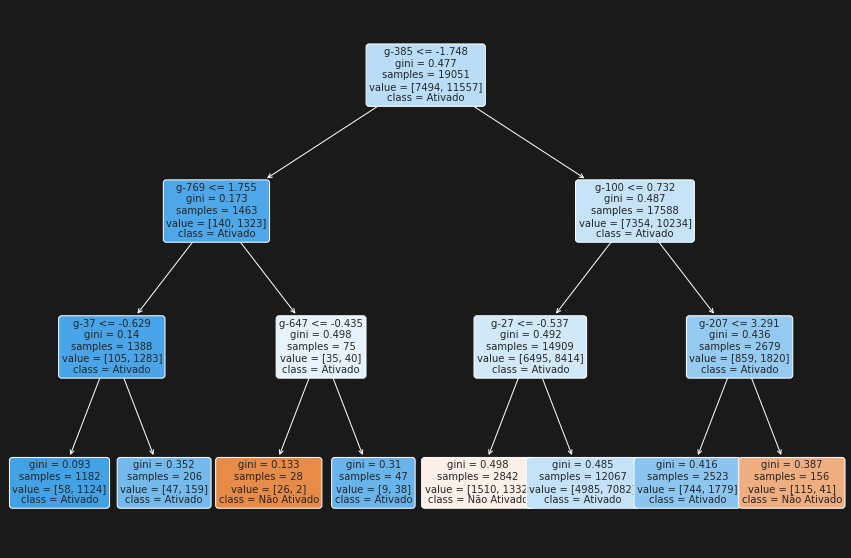

In [62]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

O desempenho do modelo com apenas 3 camadas de decisão não foi tão satisfatório assim. 

Por isso, o max_depth deve ser variado dentro de um intervalo de valores:

No caso abaixo, entre 1 e 14 camadas.

In [63]:
teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [64]:
for i in range(len(treino)): print('profundidade da árvore:', i+1, 'score treino:', treino[i], 'score teste:', teste[i]);

profundidade da árvore: 1 score treino: 0.6066348223190384 score teste: 0.6067604450976275
profundidade da árvore: 2 score treino: 0.6066348223190384 score teste: 0.6067604450976275
profundidade da árvore: 3 score treino: 0.6211222508004829 score teste: 0.6105395758975436
profundidade da árvore: 4 score treino: 0.6360820954280615 score teste: 0.6204073063195465
profundidade da árvore: 5 score treino: 0.6412261823526324 score teste: 0.6208272097417594
profundidade da árvore: 6 score treino: 0.6489423127394888 score teste: 0.6185177409195884
profundidade da árvore: 7 score treino: 0.6606477350270327 score teste: 0.6225068234306109
profundidade da árvore: 8 score treino: 0.6707259461445594 score teste: 0.6204073063195465
profundidade da árvore: 9 score treino: 0.6896225919899218 score teste: 0.6166281755196305
profundidade da árvore: 10 score treino: 0.706892026665267 score teste: 0.6136888515641402
profundidade da árvore: 11 score treino: 0.7294630203138943 score teste: 0.607390300230946

**Problema de overfitting:**

Observando as diferenças entre os scores de treino e teste, percebe-se que inicialmente os valores de treino e teste são muito próximos mas, conforme a profundiade aumenta, o valor da acurácia para os dados de treino aumentam muito enquanto, esse mesmo valor para os dados de teste, vai caindo (a diferença entre eles aumenta).

Isso significa que, conforme a profundidade da árvore de decisão aumenta, a classificação para os dados de treino ficam muito boas, pois ela consegue captar muito bem as características desses dados em particular. 

Em contrapartida, o modelo fica tão bom para os dados de treino que quando um novo conjunto de dados (teste) é apresentado, ele não consegue generalizar tão bem e assim, a acurácia vai caindo em relação ao conjunto de treino.

Esse problema de um modelo com performance muito boa nos dados de treino mas performance em queda nos dados de teste, é muito conhecido na ciência de dados e é chamado de **overfitting**.

Assim, apenas aumentar a profundidade da árvore não é suficiente para melhorar a acurácia do modelo, precisa-se de outras estratégias. Uma estratégia de ML mais robusta que pode ser utilizada consiste na Random Forest.

In [65]:
[treino[i]-teste[i] for i in range(len(teste))] #diferenças entre as acurácias de treino e teste

[-0.000125622778589074,
 -0.000125622778589074,
 0.010582674902939293,
 0.01567478910851494,
 0.02039897261087298,
 0.030424571819900326,
 0.038140911596421745,
 0.050318639825012834,
 0.07299441647029137,
 0.09320317510112675,
 0.12207272008294745,
 0.15498389336123786,
 0.17703009038591422,
 0.20091324090204932]

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Profundidade árvore')]

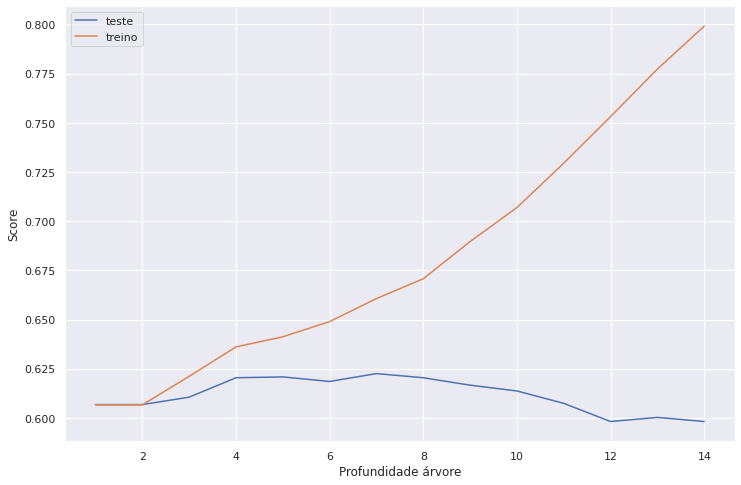

In [66]:
plt.figure(figsize=(12, 8))
ax=sns.lineplot(x=range(1,15), y = teste, label='teste')
ax=sns.lineplot(x=range(1,15), y = treino, label='treino')
ax.set(xlabel='Profundidade árvore', ylabel='Score')

**Técnica de ML: Random Forest**

O modelo de Random Forest cria várias árvores de decisões na qual ele considera amostras aleatórias do conjunto de dados total para realizar as predições.

In [67]:
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6460214150745328

**Incrementando as features do modelo:**

Inclusão das features relacionadas aos experimentos: tratamento, dose e tempo.

Contudo, a função de Random Forest (RandomForestClassifier()) não aceita variáveis em formato string. Por isso, é preciso tratar as variáveis que são strings e transformá-las em números (ou no formato float64).


**Transformação de variáveis tipo string para numérico:**

Para fazer essa transformação, pode-se utilizar a função do Pandas get_dummies e nela, declara-se a coluna a ser transformada em dados numéricos. Por exemplo:

pd.get_dummies(dados_combinados['tratamento'])

Para fazer a transformação desejada, o get_dummies pega todas as categorias de uma variável e as transforma em novas colunas binárias. Por exemplo:

A variável tratamento apresenta duas categorias com_controle e sem_controle. O get_dummies cria duas novas colunas binárias e análogas as categorias.

In [68]:
pd.get_dummies(dados_combinados['tratamento'])

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [69]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

,id,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False,1,0,0,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False,0,0,1,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,0,1,0,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,0,1,0,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,...,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,

**Base de dados com novas features:**

Como novas features, não mais consideraremos apenas os dados genéticos, mas também as demais variáveis de tratamento, dose e tempo. Serão ignoradas as seguintes variáveis:

'id'  ->  não será relevante nesse momento pois é somente um número de identificação;\

'n_moa'  ->  não será relevante nesse momento pois é a quantidade de MOAs ativados;\

'ativo_moa'  ->  variável resposta;\

'composto'  ->  não será relevante nesse momento pois identifica o composto usado e foge do objetivo do problema;

In [70]:
dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

,tratamento,tempo,dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,...,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,eh_controle,tempo_24,tempo_48,tempo_72
0,com_droga,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,False,1,0,0
1,com_droga,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False,0,0,1
2,com_droga,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,False,0,1,0
3,com_droga,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False,0,1,0
4,com_droga,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,com_droga,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,...,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.61

**Redefinindo a variável x e treinando o modelo com os diferentes modelos de ML:**

O modelo de Regressão Logística atingiu uma acurácia de ~66,0%, sendo melhor com essa nova base de dados.

O modelo atingiu uma acurácia de ~69,0%, também apresentando melhora de acurácia e superando os outros modelos.

O modelo atingiu uma acurácia de ~68,0%, melhorando a acurácia em relação à base anterior.

Assim, a base com as novas features de experimentos representa melhor o comportamento de ativação ou não ativação dos MOAs.

Contudo, esses modelos precisam ser melhor tunados para obterem melhores resultados.

In [72]:
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino) #treino
scr=modelo_rlogistica.score(x_teste, y_teste) #predição e calculo de acurácia
print(scr)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
scr=modelo_arvore.score(x_teste, y_teste)
print(scr)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
scr=modelo_randomforest.score(x_teste, y_teste)
print(scr)

0.6644971656519001
0.686122191895864
0.6840226747847995
